brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


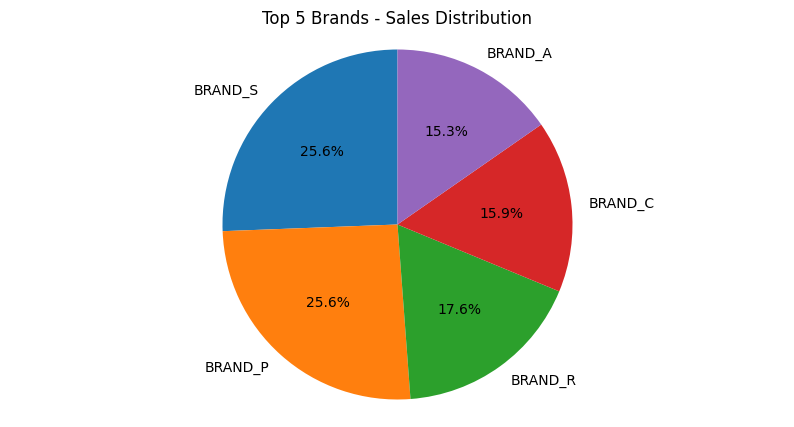

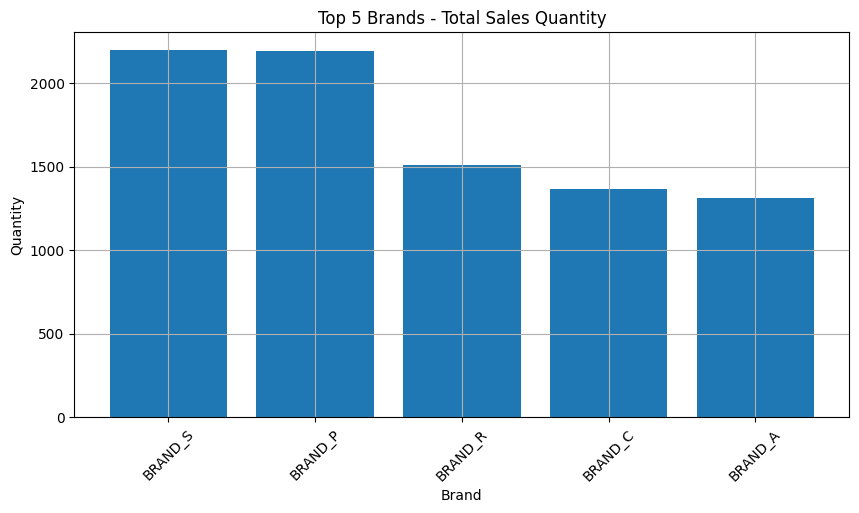

In [ ]:
import pandas as pd

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data penjualan pada bulan Desember 2019
december_sales = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung total quantity terjual per brand
brand_sales = december_sales.groupby('brand')['quantity'].sum().sort_values(ascending=False)

# Menampilkan top 5 brands
top_5_brands = brand_sales.head(5)
print(top_5_brands)

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.pie(top_5_brands, labels=top_5_brands.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Brands - Sales Distribution')
plt.axis('equal')

# Membuat bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_brands.index, top_5_brands)

plt.title('Top 5 Brands - Total Sales Quantity')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

CASE 1 MENENTUKAM 5 TOP BRAND

In [ ]:
import pandas as pd

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat dataframe baru hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung total quantity terjual per brand
brand_quantity = df_december.groupby('brand')['quantity'].sum()

# Mengurutkan brand berdasarkan total quantity terjual
top_5_brands = brand_quantity.nlargest(5).index

# Membuat variabel baru dengan data penjualan bulan Desember 2019 untuk top 5 brand
dataset_top5brand_dec = df_december[df_december['brand'].isin(top_5_brands)]

# Menampilkan top 5 brands
print("Top 5 brands in December 2019:")
print(top_5_brands)

Top 5 brands in December 2019:
Index(['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A'], dtype='object', name='brand')


CASE 1

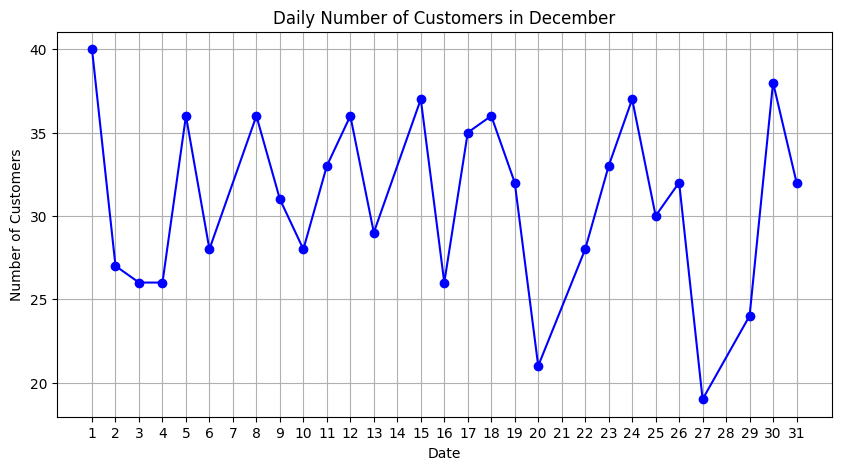

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat dataframe baru hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung jumlah unique customers per tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-', color='blue')

plt.title('Daily Number of Customers in December')
plt.xlabel('Date')
plt.ylabel('Number of Customers')

plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

CASE 2

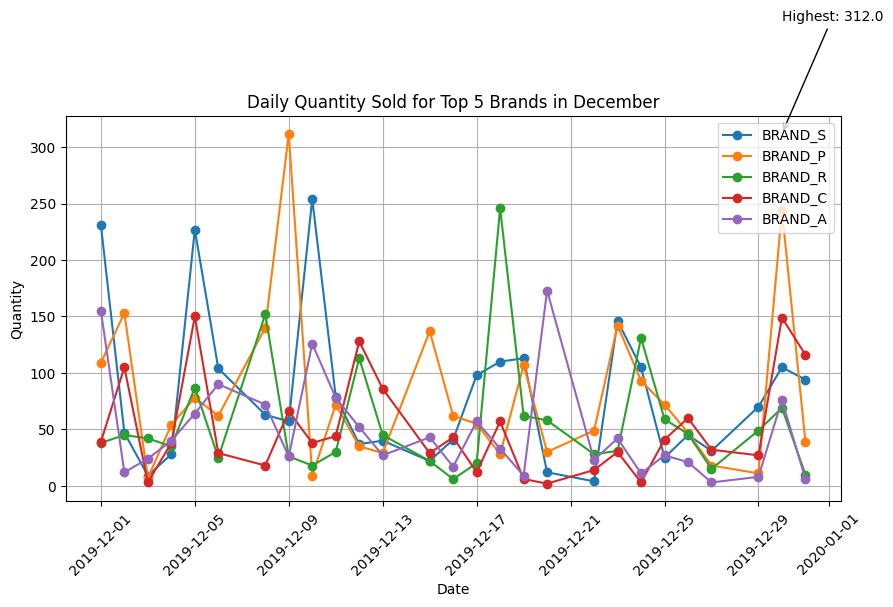

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat dataframe baru hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung total quantity terjual per brand per tanggal
daily_quantity = df_december.pivot_table(index='order_date', columns='brand', values='quantity', aggfunc='sum')

# Mengambil top 5 brand berdasarkan total quantity terjual
top_5_brands = df_december.groupby('brand')['quantity'].sum().nlargest(5).index

# Membuat multi-line chart
plt.figure(figsize=(10, 5))

for brand in top_5_brands:
    plt.plot(daily_quantity.index, daily_quantity[brand], marker='o', linestyle='-', label=brand)

# Menemukan tanggal dengan lonjakan quantity tertinggi
lonjakan_tanggal = daily_quantity.idxmax().max()
lonjakan_quantity = daily_quantity.max().max()

# Memberikan anotasi untuk titik lonjakan
plt.annotate(f'Highest: {lonjakan_quantity}',
             xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.title('Daily Quantity Sold for Top 5 Brands in December')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

CASE 3

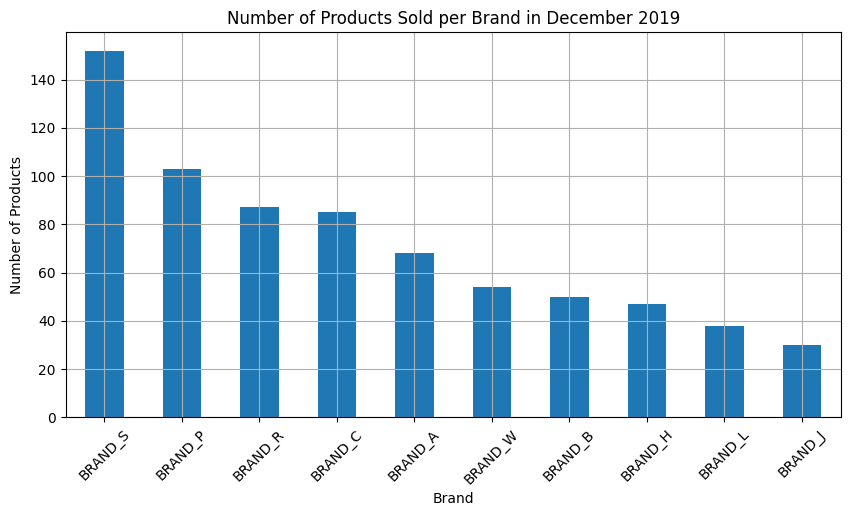

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat dataframe baru hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung jumlah product terjual per brand
brand_product_count = df_december.groupby('brand')['product_id'].nunique()

# Mengurutkan brand berdasarkan jumlah product terjual
brand_product_count_sorted = brand_product_count.sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 5))
brand_product_count_sorted.plot(kind='bar')

plt.title('Number of Products Sold per Brand in December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

CASE 4

<Figure size 1000x500 with 0 Axes>

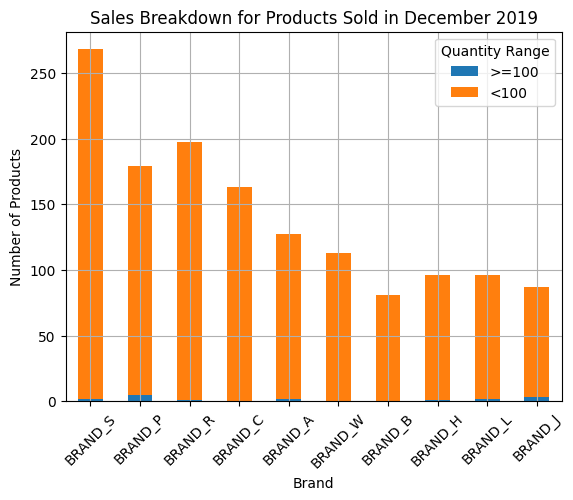

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat dataframe baru hanya untuk bulan Desember 2019
df_december = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung jumlah product terjual per brand
brand_product_count = df_december.groupby('brand')['product_id'].nunique()

# Mengurutkan brand berdasarkan jumlah product terjual
brand_product_count_sorted = brand_product_count.sort_values(ascending=False)

# Membuat dataframe untuk product yang terjual >= 100
df_above_100 = df_december[df_december['quantity'] >= 100]
above_100_count = df_above_100.groupby('brand')['product_id'].count()

# Membuat dataframe untuk product yang terjual < 100
df_below_100 = df_december[df_december['quantity'] < 100]
below_100_count = df_below_100.groupby('brand')['product_id'].count()

# Menggabungkan kedua dataframe di atas
stacked_data = pd.concat([above_100_count, below_100_count], axis=1)
stacked_data.columns = ['>=100', '<100']
stacked_data = stacked_data.reindex(brand_product_count_sorted.index)

# Membuat stacked chart
plt.figure(figsize=(10, 5))
stacked_data.plot(kind='bar', stacked=True)

plt.title('Sales Breakdown for Products Sold in December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.legend(title='Quantity Range')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

CASE 5

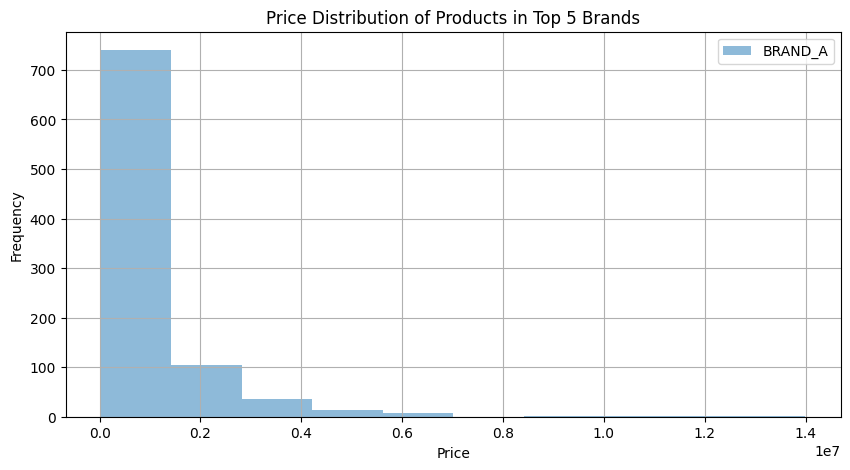

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung median harga produk per brand
median_prices = df.groupby(['brand', 'product_id'])['item_price'].median()

# Mengambil top 5 brand
top_5_brands = df['brand'].value_counts().head(5).index

# Mengambil data produk dari top 5 brand
top_5_products = median_prices.loc[top_5_brands]

# Menghitung jumlah produk per brand
num_products = top_5_products.groupby('brand').size()

# Membuat histogram
plt.figure(figsize=(10, 5))
plt.hist(top_5_products, bins=10, alpha=0.5)

plt.title('Price Distribution of Products in Top 5 Brands')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.legend(num_products.index)
plt.grid(True)
plt.show()

CASE 6A

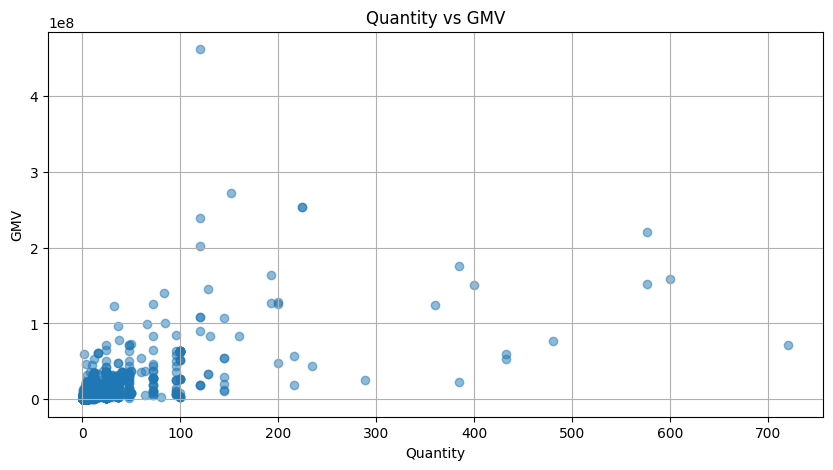

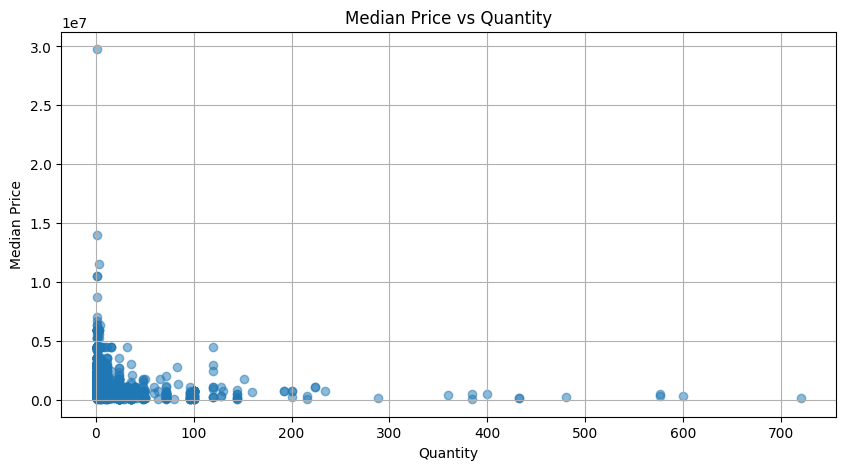

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']

# Membuat scatter plot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(df['quantity'], df['GMV'], alpha=0.5)

plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')

plt.grid(True)
plt.show()

# Menghitung median harga per product_id
median_price = df.groupby('product_id')['item_price'].median()

# Membuat scatter plot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(df['quantity'], median_price[df['product_id']], alpha=0.5)

plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')

plt.grid(True)
plt.show()

CASE 6B

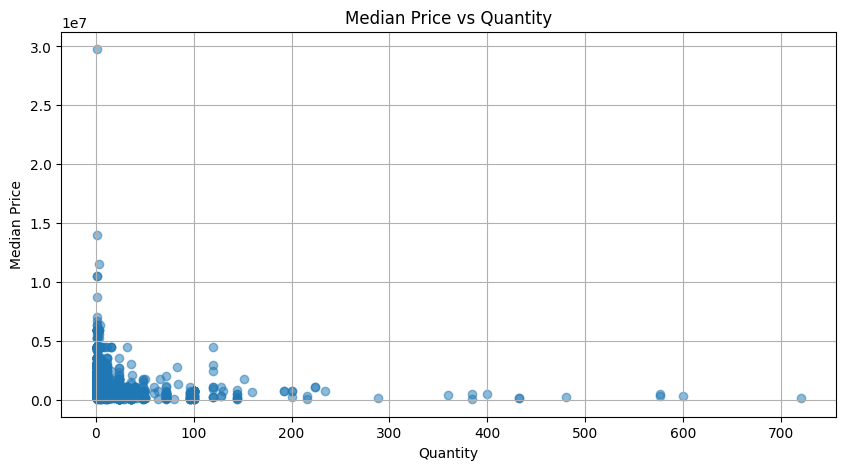

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari URL
url = 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'
df = pd.read_csv(url)

# Menghitung median harga per product_id
median_price = df.groupby('product_id')['item_price'].median()

# Membuat scatter plot median harga vs quantity
plt.figure(figsize=(10, 5))
plt.scatter(df['quantity'], median_price[df['product_id']], alpha=0.5)

plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')

plt.grid(True)
plt.show()